## Guided Project: Visualizing Earnings Based On College Majors

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

Rank - Rank by median earnings (the dataset is ordered by this column).
Major_code - Major code.
Major - Major description.
Major_category - Category of major.
Total - Total number of people with major.
Sample_size - Sample size (unweighted) of full-time.
Men - Male graduates.
Women - Female graduates.
ShareWomen - Women as share of total.
Employed - Number employed.
Median - Median salary of full-time, year-round workers.
Low_wage_jobs - Number in low-wage service jobs.
Full_time - Number employed 35 hours or more.
Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

Do students in more popular majors make more money?
Using scatter plots
How many majors are predominantly male? Predominantly female?
Using histograms
Which category of majors have the most students?
Using bar plots

In [79]:
# Import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Read the dataset
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [13]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [14]:
# Generate summary statistics
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [15]:
raw_data_count = recent_grads.shape[0]

In [16]:
# Drop rows with missing values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]

In [26]:
print("{} row was dropped.".format(raw_data_count-cleaned_data_count))

1 row was dropped.


### Scatter plots
Generate scatter plots in separate jupyter notebook cells to explore the following relations: Sample_size and Median, Sample_size and Unemployment_rate, Full_time and Median, ShareWomen and Unemployment_rate, Men and Median, Women and Median

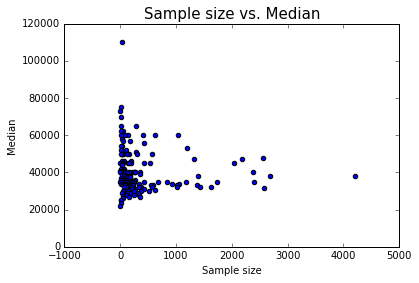

In [34]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
plt.xlabel('Sample size')
plt.ylabel('Median')
plt.title('Sample size vs. Median', size=15)

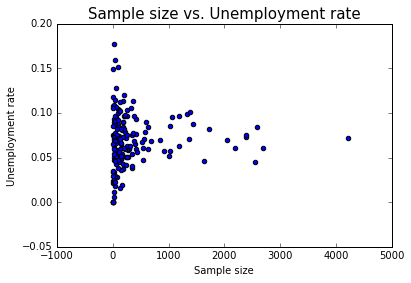

In [35]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
plt.xlabel('Sample size')
plt.ylabel('Unemployment rate')
plt.title('Sample size vs. Unemployment rate', size=15)

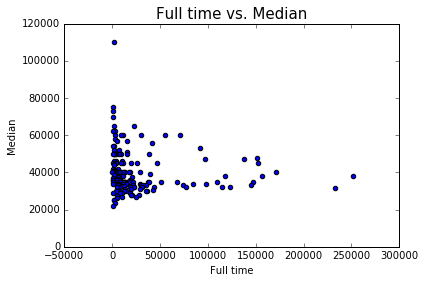

In [36]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
plt.xlabel('Full time')
plt.ylabel('Median')
plt.title('Full time vs. Median', size=15)

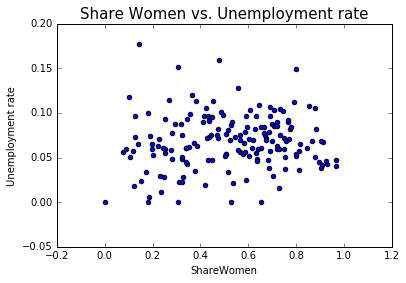

In [37]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
plt.xlabel('ShareWomen')
plt.ylabel('Unemployment rate')
plt.title('Share Women vs. Unemployment rate', size=15)

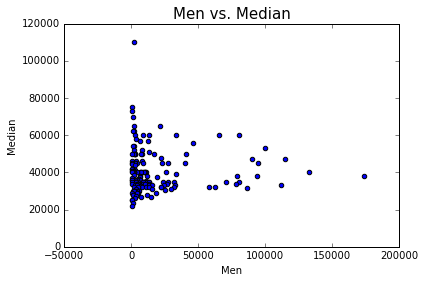

In [38]:
recent_grads.plot(x='Men', y='Median', kind='scatter')
plt.xlabel('Men')
plt.ylabel('Median')
plt.title('Men vs. Median', size=15)

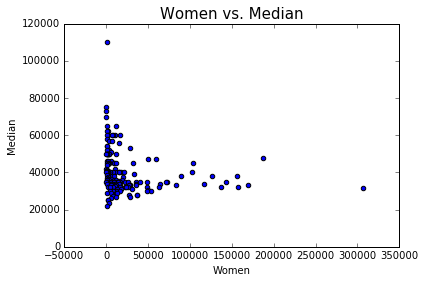

In [39]:
recent_grads.plot(x='Women', y='Median', kind='scatter')
plt.xlabel('Women')
plt.ylabel('Median')
plt.title('Women vs. Median', size=15)

These plots help to explore and answer the following questions:

Do students in more popular majors make more money?
The students in popular majors (Total more than 50000) present a median salary similar to the rest of the majors. However, a few of them present higher salaries.

Do students that majored in subjects that were majority female make more money?
Most of the students that belong to majors that were majority female (ShareWomen higher than 0.6) present low median salaries. However, a few majors achive median salaries between 40000 and 60000. Notice how when the number of share women increases the median salary decreases.

Is there any link between the number of full-time employees and median salary?
We can see how for the low values of the number of full-time employees the median salary is high. However, in general there are not relation between the number of full time employees and the median salary.

### Histograms
Generate histograms to explore the distributions of the columns: 
Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men and Women

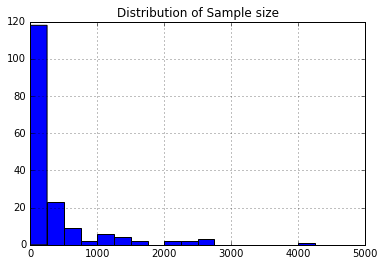

In [72]:
recent_grads['Sample_size'].hist(bins=20, range=(0,5000)).set_title('Distribution of Sample size')

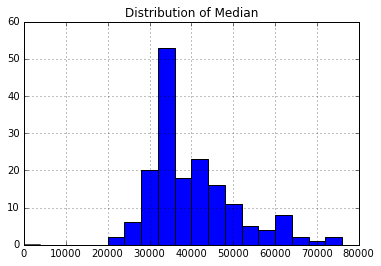

In [74]:
recent_grads['Median'].hist(bins=20, range=(0,80000)).set_title('Distribution of Median')

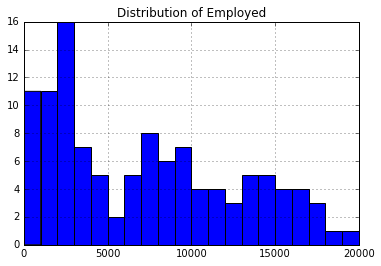

In [76]:
recent_grads['Employed'].hist(bins=20, range=(0,20000)).set_title('Distribution of Employed')

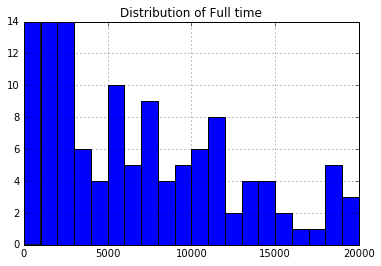

In [77]:
recent_grads['Full_time'].hist(bins=20, range=(0,20000)).set_title('Distribution of Full time')

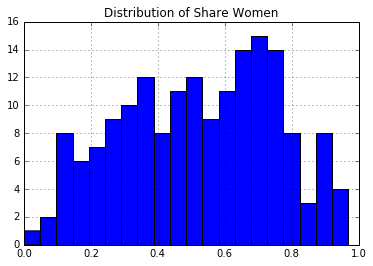

In [78]:
recent_grads['ShareWomen'].hist(bins=20).set_title('Distribution of Share Women')

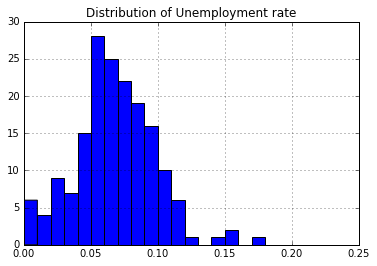

In [71]:
recent_grads['Unemployment_rate'].hist(bins=20, range=(0,0.2)).set_title('Distribution of Unemployment rate')

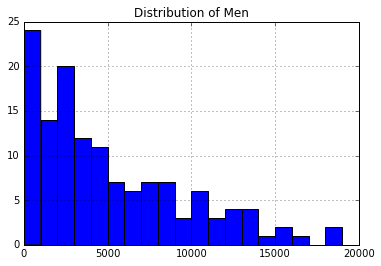

In [65]:
recent_grads['Men'].hist(bins=20, range=(0,20000)).set_title('Distribution of Men')

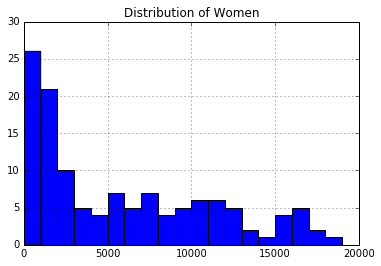

In [64]:
recent_grads['Women'].hist(bins=20, range=(0,20000)).set_title('Distribution of Women')

### Scatter Matrix
Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb583f94668>,
      dtype=object)

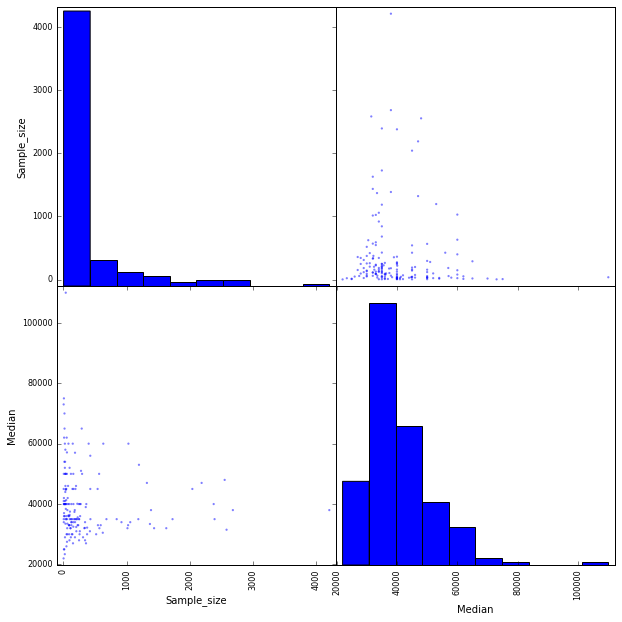

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb583e130f0>,
      dtype=object)

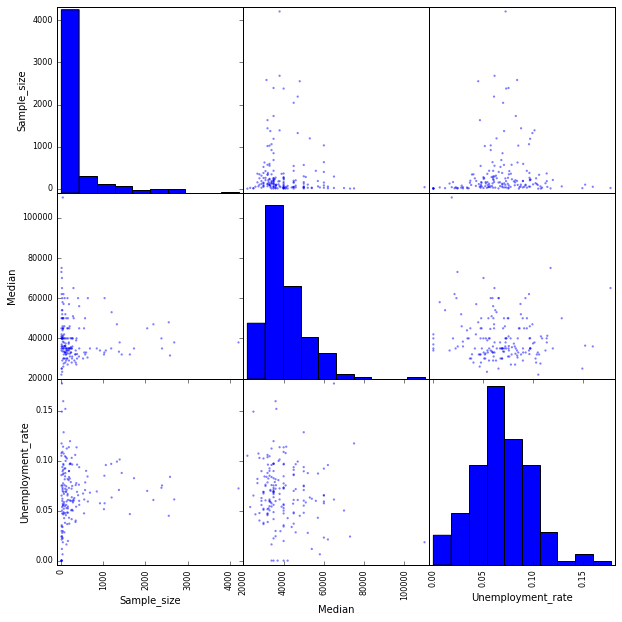

In [50]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

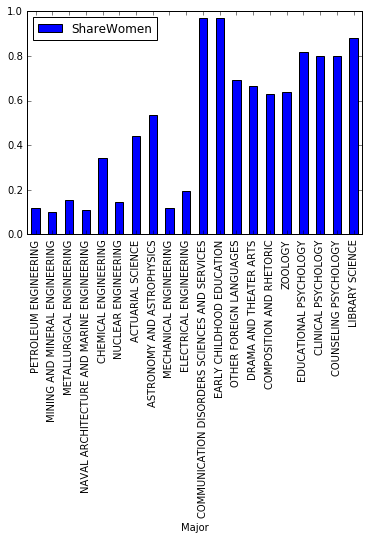

In [63]:
recent_grads[:10].append(recent_grads[-10:]).plot.bar(x='Major', y='ShareWomen', color='blue')

### Bar plots

Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe. 
Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

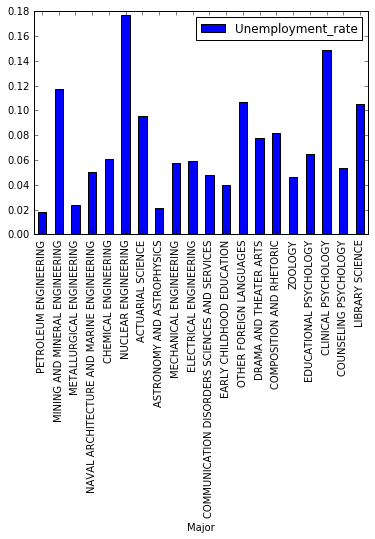

In [59]:
recent_grads[:10].append(recent_grads[-10:]).plot.bar(x='Major', y='Unemployment_rate', color='blue')